# P1 - Identificando personas desde una imagen de su cara

Elaborado por GRUPO 1:

- Juanita Piraban Barbosa - 201216313
- Lorena Morales Rodríguez - 202027957
- Alejandro Barinas Guio - 201628859
- Jaime Humberto Trujillo Perea - 201920366
- Alexander Zapata Galindo - 201425426

In [1]:
# Librerías
from sklearn.datasets import fetch_lfw_people
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from keras import models
from keras import layers

import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# DataSet
lfw_people = fetch_lfw_people(min_faces_per_person=50, resize=0.4)

In [3]:
# Images
lfw_people.images.shape

(1560, 50, 37)

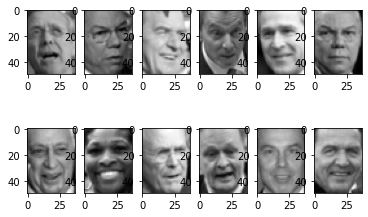

In [114]:
# Ejemplos
plt.subplot(2,6,1)
plt.imshow(lfw_people.images[2], cmap=plt.get_cmap('gray'))
plt.subplot(2,6,2)
plt.imshow(lfw_people.images[8], cmap=plt.get_cmap('gray'))
plt.subplot(2,6,3)
plt.imshow(lfw_people.images[29], cmap=plt.get_cmap('gray'))
plt.subplot(2,6,4)
plt.imshow(lfw_people.images[0], cmap=plt.get_cmap('gray'))
plt.subplot(2,6,5)
plt.imshow(lfw_people.images[4], cmap=plt.get_cmap('gray'))
plt.subplot(2,6,6)
plt.imshow(lfw_people.images[32], cmap=plt.get_cmap('gray'))
plt.subplot(2,6,7)
plt.imshow(lfw_people.images[6], cmap=plt.get_cmap('gray'))
plt.subplot(2,6,8)
plt.imshow(lfw_people.images[24], cmap=plt.get_cmap('gray'))
plt.subplot(2,6,9)
plt.imshow(lfw_people.images[25], cmap=plt.get_cmap('gray'))
plt.subplot(2,6,10)
plt.imshow(lfw_people.images[697], cmap=plt.get_cmap('gray'))
plt.subplot(2,6,11)
plt.imshow(lfw_people.images[13], cmap=plt.get_cmap('gray'))
plt.subplot(2,6,12)
plt.imshow(lfw_people.images[666], cmap=plt.get_cmap('gray'))
plt.show()


In [79]:
# images and labels
X = lfw_people.images
y = lfw_people.target
target_names = lfw_people.target_names

In [80]:
X.shape

(1560, 50, 37)

In [81]:
y.shape

(1560,)

In [82]:
# split into a training and testing set
X_train_image, X_test_image, y_train_labels, y_test_labels = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [83]:
#shape train
print(X_train_image.shape)
n_train=X_train_image.shape[0]

(1170, 50, 37)


In [84]:
#shape test
print(X_test_image.shape)
n_test=X_test_image.shape[0]

(390, 50, 37)


In [85]:
# Transformacion
X_train_image = X_train_image.reshape((n_train, 50 * 37))
X_train_image = X_train_image.astype('float32') / 255
X_test_image = X_test_image.reshape((n_test, 50 * 37))
X_test_image = X_test_image.astype('float32') / 255

In [86]:
# Categorizar datos 
y_train_labels = to_categorical(y_train_labels)
y_test_labels = to_categorical(y_test_labels)

In [87]:
y_train_labels.shape

(1170, 12)

In [88]:
y_test_labels.shape

(390, 12)

### MODELO 1

In [178]:
model_1 = models.Sequential()
model_1.add(layers.Dense(1850, activation='relu', input_shape=(50 * 37,)))
model_1.add(layers.Dense(144, activation='sigmoid'))
model_1.add(layers.Dense(12, activation='softmax'))
model_1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [179]:
model_1.fit(X_train_image, y_train_labels, epochs=150, batch_size=256)

Epoch 1/150
5/5 [==============================] - 2s 73ms/step - loss: 2.6648 - accuracy: 0.1707
Epoch 2/150
5/5 [==============================] - 0s 67ms/step - loss: 2.2427 - accuracy: 0.3322
Epoch 3/150
5/5 [==============================] - 0s 53ms/step - loss: 2.1518 - accuracy: 0.3370
Epoch 4/150
5/5 [==============================] - 0s 54ms/step - loss: 2.1298 - accuracy: 0.3419
Epoch 5/150
5/5 [==============================] - 0s 53ms/step - loss: 2.1234 - accuracy: 0.3411
Epoch 6/150
5/5 [==============================] - 0s 52ms/step - loss: 2.1486 - accuracy: 0.3331
Epoch 7/150
5/5 [==============================] - 0s 53ms/step - loss: 2.1176 - accuracy: 0.3325
Epoch 8/150
5/5 [==============================] - 0s 58ms/step - loss: 2.1016 - accuracy: 0.3297
Epoch 9/150
5/5 [==============================] - 0s 57ms/step - loss: 2.0711 - accuracy: 0.3343
Epoch 10/150
5/5 [==============================] - 0s 53ms/step - loss: 2.0686 - accuracy: 0.3188
Epoch 11/150
5/5 [=

5/5 [==============================] - 0s 55ms/step - loss: 0.4325 - accuracy: 0.8914
Epoch 84/150
5/5 [==============================] - 0s 54ms/step - loss: 0.3918 - accuracy: 0.8924
Epoch 85/150
5/5 [==============================] - 0s 51ms/step - loss: 0.4434 - accuracy: 0.8751
Epoch 86/150
5/5 [==============================] - 0s 54ms/step - loss: 0.4053 - accuracy: 0.8947
Epoch 87/150
5/5 [==============================] - 0s 53ms/step - loss: 0.3818 - accuracy: 0.9075
Epoch 88/150
5/5 [==============================] - 0s 52ms/step - loss: 0.3907 - accuracy: 0.9023
Epoch 89/150
5/5 [==============================] - 0s 59ms/step - loss: 0.3797 - accuracy: 0.9072
Epoch 90/150
5/5 [==============================] - 0s 52ms/step - loss: 0.3283 - accuracy: 0.9099
Epoch 91/150
5/5 [==============================] - 0s 51ms/step - loss: 0.3316 - accuracy: 0.9216
Epoch 92/150
5/5 [==============================] - 0s 51ms/step - loss: 0.3392 - accuracy: 0.9076
Epoch 93/150
5/5 [=====

In [180]:
test_loss, test_acc = model_1.evaluate(X_test_image, y_test_labels)

13/13 [==============================] - 0s 8ms/step - loss: 0.6689 - accuracy: 0.8359
